<a href="https://colab.research.google.com/github/wudih146/PythonML/blob/master/testnlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## 切换到当前路径下
import os
path = '/content/drive/MyDrive/Colab Notebooks/NLPTest'
os.chdir(path)
os.listdir(path)

['CoreNatureDictionary.mini.txt',
 'my_cws_corpus.txt',
 'stopwords.txt',
 'testnlp.ipynb']

In [ ]:

import os 
os.getcwd()
def load_dictionary():
    dic = set()

    # 按行读取字典文件，每行第一个空格之前的字符串提取出来。
    for line in open("CoreNatureDictionary.mini.txt","r"):
        dic.add(line[0:line.find('	')])
    
    return dic
dic=load_dictionary()
mydic=list(dic)
mydic[:100]

['大包大揽',
 '大泽',
 '病虫害',
 '药衡',
 '才气',
 '簋',
 '管理费',
 '剧种',
 '写道',
 '辅助',
 '北票市',
 '所在',
 '扩充',
 '内忧',
 '跳箱',
 '年菜',
 '浅说',
 '番薯',
 '造册',
 '酒池肉林',
 '弘',
 '勉',
 '心惊胆颤',
 '供大于求',
 '物美价廉',
 '物极必反',
 '一鳞半爪',
 '置信',
 '赤眼蜂',
 '追念',
 '坐商',
 '长枪',
 '彭州市',
 '贵姓',
 '坚信不疑',
 '神气活现',
 '分子生物学',
 '过关',
 '提琴',
 '断裂带',
 '浮价款',
 '钡',
 '暴晒',
 '严谨',
 '苦熬',
 '甬',
 '糖精',
 '一得之功',
 '阿斗',
 '冗',
 '莫索罗',
 '哈龙',
 '棉籽油',
 '认识论',
 '极性',
 '猪舍',
 '万通',
 '内陆河',
 '有头无尾',
 '半径',
 '开放式',
 '前仆后继',
 '析取',
 '油渣',
 '着色剂',
 '小花棘豆',
 '保加利亚',
 '火油炉',
 '公理',
 '护卫',
 '咪咪',
 '缺德',
 '二话',
 '远征',
 '铁算盘',
 '丙亥',
 '半边天',
 '收藏版',
 '汤阴县',
 '下叔村',
 '娇美',
 '敬仰',
 '圣路易斯市',
 '旅游者',
 '外电路',
 '气息奄奄',
 '当夜',
 '筒裙',
 '异彩',
 '侏儒',
 '数值',
 '多难兴邦',
 '十一届',
 '真容',
 '高中版',
 '终身制',
 '爻',
 '相形见绌',
 '印度尼西亚',
 '视点']

完全切分

In [ ]:
def fully_segment(text, dic):
    word_list = []
    for i in range(len(text)):                  # i 从 0 到text的最后一个字的下标遍历
        for j in range(i + 1, len(text) + 1):   # j 遍历[i + 1, len(text)]区间
            word = text[i:j]                    # 取出连续区间[i, j]对应的字符串
            if word in dic:                     # 如果在词典中，则认为是一个词
                word_list.append(word)
    return word_list
  
dic = load_dictionary()
print(fully_segment('就读北京大学', dic))

['就', '就读', '读', '北', '北京', '北京大学', '京', '大', '大学', '学']


正向最长匹配

In [ ]:
def forward_segment(text, dic):
    word_list = []
    i = 0
    while i < len(text):
        longest_word = text[i]                      # 当前扫描位置的单字
        for j in range(i + 1, len(text) + 1):       # 所有可能的结尾
            word = text[i:j]                        # 从当前位置到结尾的连续字符串
            if word in dic:                         # 在词典中
                if len(word) > len(longest_word):   # 并且更长
                    longest_word = word             # 则更优先输出
        word_list.append(longest_word)              # 输出最长词
        i += len(longest_word)                      # 正向扫描
    return word_list

dic = load_dictionary()
print(forward_segment('就读北京大学', dic))
print(forward_segment('研究生命起源', dic))

['就读', '北京大学']
['研究生', '命', '起源']


逆向最长匹配

In [ ]:
def backward_segment(text, dic):
    word_list = []
    i = len(text) - 1
    while i >= 0:                                   # 扫描位置作为终点
        longest_word = text[i]                      # 扫描位置的单字
        for j in range(0, i):                       # 遍历[0, i]区间作为待查询词语的起点
            word = text[j: i + 1]                   # 取出[j, i]区间作为待查询单词
            if word in dic:
                if len(word) > len(longest_word):   # 越长优先级越高
                    longest_word = word
                    break
        word_list.insert(0, longest_word)           # 逆向扫描，所以越先查出的单词在位置上越靠后
        i -= len(longest_word)
    return word_list

dic = load_dictionary()
print(backward_segment('研究生命起源', dic))
print(backward_segment('项目的研究', dic))

['研究', '生命', '起源']
['项', '目的', '研究']


双向最长匹配

In [ ]:
def count_single_char(word_list: list):  # 统计单字成词的个数
    return sum(1 for word in word_list if len(word) == 1)


def bidirectional_segment(text, dic):
    f = forward_segment(text, dic)
    b = backward_segment(text, dic)
    if len(f) < len(b):                                  # 词数更少优先级更高
        return f
    elif len(f) > len(b):
        return b
    else:
        if count_single_char(f) < count_single_char(b):  # 单字更少优先级更高
            return f
        else:
            return b                                     # 都相等时逆向匹配优先级更高
        

print(bidirectional_segment('研究生命起源', dic))
print(bidirectional_segment('项目的研究', dic))

['研究', '生命', '起源']
['项', '目的', '研究']


# 字典树与HanLP词典分词实现

In [ ]:

## 节点类 
class Node():
    def __init__(self) -> None:
        self.children = {}
        self.value = None
    
    # 增加节点
    def add_child(self, char, value, overwrite=False):
        child = self.children.get(char)
        if child is None:
            child = Node()                # 创建子节点
            self.children[char] = child   # 子节点赋值，字 -> 节点的映射
        
        if value is not None or overwrite:
            child.value = value           # 节点上对应的词
        
        return child
    
## 字典树  继承节点类   
class Trie(Node):

    def __contains__(self, key):
        return self[key] is not None
    
    # 查询方法
    def __getitem__(self, key):
        state = self
        for char in key:
            state = state.children.get(char)
            if state is None:
                return None
        
        return state.value
    
    # 重载方法，使得类可以像对待dict那样操作字典树
    # 构建一个词的字典树
    def __setitem__(self, key, value):
        state = self
        for i, char in enumerate(key):
            if i < len(key) - 1:
                state = state.add_child(char, None)
            else:
                state = state.add_child(char, value, True)


if __name__ == '__main__':
    trie = Trie()
    # 增
    trie['自然'] = 'nature'
    trie['自然人'] = 'human'
    trie['自然语言'] = 'language'
    trie['自语'] = 'talk	to oneself'
    trie['入门'] = 'introduction'
    assert '自然' in trie
    # 删
    trie['自然'] = None
    assert '自然' not in trie
    # 改
    trie['自然语言'] = 'human language'
    assert trie['自然语言'] == 'human language'
    # 查
    assert trie['入门'] == 'introduction'
    print()


HanLP的词典分词实现

In [ ]:
!pip install pyhanlp

In [ ]:
from pyhanlp import *

# 不显示词性
HanLP.Config.ShowTermNature = False

# 可传入自定义字典 [dir1, dir2]
segment = DoubleArrayTrieSegment()
# 激活数字和英文识别
segment.enablePartOfSpeechTagging(True)

print(segment.seg("江西鄱阳湖干枯，中国最大淡水湖变成大草原"))
print(segment.seg("上海市虹口区大连西路550号SISU"))

java.lang.IndexOutOfBoundsException: ignored

去掉停用词

In [ ]:
def load_from_file(path):
    """
    从词典文件加载DoubleArrayTrie
    :param path: 词典路径
    :return: 双数组trie树
    """
    map = JClass('java.util.TreeMap')()  # 创建TreeMap实例
    with open(path) as src:
        for word in src:
            word = word.strip()  # 去掉Python读入的\n
            map[word] = word
    return JClass('com.hankcs.hanlp.collection.trie.DoubleArrayTrie')(map)


## 去掉停用词
def remove_stopwords_termlist(termlist, trie):
    return [term.word for term in termlist if not trie.containsKey(term.word)]


trie = load_from_file('stopwords.txt')
termlist = segment.seg("江西鄱阳湖干枯了，中国最大的淡水湖变成了大草原")
print('去掉停用词前：', termlist)

print('去掉停用词后：', remove_stopwords_termlist(termlist, trie))

NameError: ignored

# 二元语法与中文分词

训练与预测

In [ ]:
from pyhanlp import *
from jpype import JString

## 加载 JAVA 类
CorpusLoader = SafeJClass('com.hankcs.hanlp.corpus.document.CorpusLoader')
NatureDictionaryMaker = SafeJClass('com.hankcs.hanlp.corpus.dictionary.NatureDictionaryMaker')
CoreDictionary = LazyLoadingJClass('com.hankcs.hanlp.dictionary.CoreDictionary')
WordNet = JClass('com.hankcs.hanlp.seg.common.WordNet')
Vertex = JClass('com.hankcs.hanlp.seg.common.Vertex')


def generate_wordnet(sent, trie):
    """
    生成词网
    :param sent: 句子
    :param trie: 词典（unigram）
    :return: 词网
    """
    searcher = trie.getSearcher(JString(sent), 0)
    wordnet = WordNet(sent)
    while searcher.next():
        wordnet.add(searcher.begin + 1,
                    Vertex(sent[searcher.begin:searcher.begin + searcher.length], searcher.value, searcher.index))
    # 原子分词，保证图连通
    vertexes = wordnet.getVertexes()
    i = 0
    while i < len(vertexes):
        if len(vertexes[i]) == 0:  # 空白行
            j = i + 1
            for j in range(i + 1, len(vertexes) - 1):  # 寻找第一个非空行 j
                if len(vertexes[j]):
                    break
            wordnet.add(i, Vertex.newPunctuationInstance(sent[i - 1: j - 1]))  # 填充[i, j)之间的空白行
            i = j
        else:
            i += len(vertexes[i][-1].realWord)

    return wordnet


## 维特比算法
def viterbi(wordnet):
    nodes = wordnet.getVertexes()
    # 前向遍历
    for i in range(0, len(nodes) - 1):
        for node in nodes[i]:
            for to in nodes[i + len(node.realWord)]:
                to.updateFrom(node)  # 根据距离公式计算节点距离，并维护最短路径上的前驱指针from
    # 后向回溯
    path = []  # 最短路径
    f = nodes[len(nodes) - 1].getFirst()  # 从终点回溯
    while f:
        path.insert(0, f)
        f = f.getFrom()  # 按前驱指针from回溯
    return [v.realWord for v in path]


## 训练n元语法模型
def train_bigram(corpus_path, model_path):
    sents = CorpusLoader.convert2SentenceList(corpus_path)
    for sent in sents:
        for word in sent:
            word.setLabel("n")
    
    maker = NatureDictionaryMaker()
    maker.compute(sents)
    maker.saveTxtTo(model_path)      # 会生成两个统计词频文件

## 加载 n元语法模型
def load_bigram(model_path, sent):
    HanLP.Config.CoreDictionaryPath = model_path + ".txt"  # unigram
    HanLP.Config.BiGramDictionaryPath = model_path + ".ngram.txt"  # bigram
    
    wordnet = generate_wordnet(sent, CoreDictionary.trie)
    print(viterbi(wordnet))



corpus_path = 'my_cws_corpus.txt' # 语料库文件
model_path = 'my_cws_model'       # 模型保存路径
sent = '货币和服务'                 # 需要分词的语句

train_bigram(corpus_path, model_path)
load_bigram(model_path, sent)





[' ', '货币', '和', '服务', ' ']


HanLP分词器简洁版：

In [ ]:
from pyhanlp import *

ViterbiSegment = SafeJClass('com.hankcs.hanlp.seg.Viterbi.ViterbiSegment')

segment = ViterbiSegment()
sentence = "社会摇摆简称社会摇"
segment.enableCustomDictionary(False)
print("不挂载词典：", segment.seg(sentence))
CustomDictionary.insert("社会摇", "nz 100")
segment.enableCustomDictionary(True)
print("低优先级词典：", segment.seg(sentence))
segment.enableCustomDictionaryForcing(True)
print("高优先级词典：", segment.seg(sentence))

不挂载词典： [社会摇摆简称社会摇]
低优先级词典： [社会摇摆简称社会摇]
高优先级词典： [社会摇, 摆简称, 社会摇]


可见，用户词典的高优先级未必是件好事

# 隐马尔可夫模型与序列标注

## 隐马尔可夫模型的训练

案例假设和模型构造

In [ ]:
import numpy as np
from pyhanlp import *
from jpype import JArray, JFloat, JInt

to_str = JClass('java.util.Arrays').toString

## 隐马尔可夫模型描述
states = ('Healthy', 'Fever')
start_probability = {'Healthy': 0.6, 'Fever': 0.4}
transition_probability = {
    'Healthy': {'Healthy': 0.7, 'Fever': 0.3},
    'Fever': {'Healthy': 0.4, 'Fever': 0.6},
}
emission_probability = {
    'Healthy': {'normal': 0.5, 'cold': 0.4, 'dizzy': 0.1},
    'Fever': {'normal': 0.1, 'cold': 0.3, 'dizzy': 0.6},
}
observations = ('normal', 'cold', 'dizzy')


def generate_index_map(lables):
    index_label = {}
    label_index = {}
    i = 0
    for l in lables:
        index_label[i] = l
        label_index[l] = i
        i += 1
    return label_index, index_label


states_label_index, states_index_label = generate_index_map(states)
observations_label_index, observations_index_label = generate_index_map(observations)



def convert_map_to_matrix(map, label_index1, label_index2):
    m = np.empty((len(label_index1), len(label_index2)), dtype=float)
    for line in map:
        for col in map[line]:
            m[label_index1[line]][label_index2[col]] = map[line][col]
    return JArray(JFloat, m.ndim)(m.tolist())

def convert_observations_to_index(observations, label_index):
    list = []
    for o in observations:
        list.append(label_index[o])
    return list

def convert_map_to_vector(map, label_index):
    v = np.empty(len(map), dtype=float)
    for e in map:
        v[label_index[e]] = map[e]
    return JArray(JFloat, v.ndim)(v.tolist())  # 将numpy数组转为Java数组


## pi：初始状态概率向量
## A：状态转移概率矩阵
## B：发射概率矩阵
A = convert_map_to_matrix(transition_probability, states_label_index, states_label_index)
B = convert_map_to_matrix(emission_probability, states_label_index, observations_label_index)
observations_index = convert_observations_to_index(observations, observations_label_index)
pi = convert_map_to_vector(start_probability, states_label_index)

FirstOrderHiddenMarkovModel = JClass('com.hankcs.hanlp.model.hmm.FirstOrderHiddenMarkovModel')
given_model = FirstOrderHiddenMarkovModel(pi, A, B)

样本生成算法

In [ ]:
## 第一个参数：序列最低长度
## 第二个参数：序列最高长度
## 第三个参数：需要生成的样本数
for O, S in given_model.generate(3, 5, 2):
    print(" ".join((observations_index_label[o] + '/' + states_index_label[s]) for o, s in zip(O, S)))

dizzy/Fever dizzy/Healthy dizzy/Healthy normal/Healthy
dizzy/Fever normal/Healthy dizzy/Healthy


隐马尔可夫模型的训练

In [ ]:
trained_model = FirstOrderHiddenMarkovModel()

## 第一个参数：序列最低长度
## 第二个参数：序列最高长度
## 第三个参数：需要生成的样本数
trained_model.train(given_model.generate(3, 10, 100000))
print('新模型与旧模型是否相同：', trained_model.similar(given_model))

新模型与旧模型是否相同： False


搜索状态序列的维特比算法

## 隐马尔可夫模型的预测

In [ ]:
pred = JArray(JInt, 1)([0, 0, 0])
prob = given_model.predict(observations_index, pred)
print(" ".join((observations_index_label[o] + '/' + states_index_label[s]) for o, s in
               zip(observations_index, pred)) + " {:.3f}".format(np.math.exp(prob)))

normal/Healthy cold/Healthy dizzy/Fever 0.015


# 感知机模型与序列标注

## 基于感知机的人名性别分类

In [ ]:
## 切换到当前路径下
import os
path = '/content/drive/MyDrive/Colab Notebooks/NLPTest'
os.chdir(path)
os.listdir(path)


['CoreNatureDictionary.mini.txt',
 'my_cws_corpus.txt',
 'stopwords.txt',
 'testnlp.ipynb',
 'my_cws_model.txt',
 'my_cws_model.ngram.txt',
 'my_cws_model.tr.txt',
 'my_cws_model.txt.bin',
 'my_cws_model.ngram.txt.table.bin']

In [ ]:
pip install pyhanlp

In [ ]:
from pyhanlp import *
from pyhanlp.static import download, remove_file, HANLP_DATA_PATH

import zipfile
import os

def test_data_path():
    """
    获取测试数据路径，位于$root/data/test，根目录由配置文件指定。
    :return:
    """
    data_path = os.path.join(HANLP_DATA_PATH, 'test')
    if not os.path.isdir(data_path):
        os.mkdir(data_path)
    return data_path

## 验证是否存在 cnname 人名性别语料库，如果没有自动下载
def ensure_data(data_name, data_url):
    root_path = test_data_path()
    dest_path = os.path.join(root_path, data_name)
    if os.path.exists(dest_path):
        return dest_path
    
    if data_url.endswith('.zip'):
        dest_path += '.zip'
    download(data_url, dest_path)
    if data_url.endswith('.zip'):
        with zipfile.ZipFile(dest_path, "r") as archive:
            archive.extractall(root_path)
        remove_file(dest_path)
        dest_path = dest_path[:-len('.zip')]
    return dest_path


## ===============================================
## 以下开始中文分词


PerceptronNameGenderClassifier = JClass('com.hankcs.hanlp.model.perceptron.PerceptronNameGenderClassifier')
cnname = ensure_data('cnname', 'http://file.hankcs.com/corpus/cnname.zip')
TRAINING_SET = os.path.join(cnname, 'train.csv')
TESTING_SET = os.path.join(cnname, 'test.csv')
MODEL = cnname + ".bin"


def run_classifier(averaged_perceptron):
    print('=====%s=====' % ('平均感知机算法' if averaged_perceptron else '朴素感知机算法'))
    
    # 感知机模型
    classifier = PerceptronNameGenderClassifier()
    print('训练集准确率：', classifier.train(TRAINING_SET, 10, averaged_perceptron))
    model = classifier.getModel()
    print('特征数量：', len(model.parameter))
    # model.save(MODEL, model.featureMap.entrySet(), 0, True)
    # classifier = PerceptronNameGenderClassifier(MODEL)
    for name in "赵建军", "沈雁冰", "陆雪琪", "李冰冰":
        print('%s=%s' % (name, classifier.predict(name)))
    print('测试集准确率：', classifier.evaluate(TESTING_SET))


if __name__ == '__main__':
    run_classifier(False)
    run_classifier(True)

下载 http://file.hankcs.com/corpus/cnname.zip 到 /usr/local/lib/python3.6/dist-packages/pyhanlp/static/data/test/cnname.zip
100.00%, 1 MB, 1316 KB/s, 还有 0 分  0 秒   
=====朴素感知机算法=====
训练集准确率： P=86.07 R=85.38 F1=85.72
特征数量： 9089
赵建军=男
沈雁冰=男
陆雪琪=男
李冰冰=女
测试集准确率： P=83.64 R=82.71 F1=83.17
=====平均感知机算法=====
训练集准确率： P=93.57 R=83.06 F1=88.00
特征数量： 9089
赵建军=男
沈雁冰=男
陆雪琪=女
李冰冰=女
测试集准确率： P=90.90 R=80.44 F1=85.35


## 基于结构化感知机的中文分词

In [ ]:
import zipfile
import os

from pyhanlp import *
from pyhanlp.static import download, remove_file, HANLP_DATA_PATH


def test_data_path():
    """
    获取测试数据路径，位于$root/data/test，根目录由配置文件指定。
    :return:
    """
    data_path = os.path.join(HANLP_DATA_PATH, 'test')
    if not os.path.isdir(data_path):
        os.mkdir(data_path)
    return data_path

## 验证是否存在 MSR语料库，如果没有自动下载
def ensure_data(data_name, data_url):
    root_path = test_data_path()
    dest_path = os.path.join(root_path, data_name)
    if os.path.exists(dest_path):
        return dest_path
    
    if data_url.endswith('.zip'):
        dest_path += '.zip'
    download(data_url, dest_path)
    if data_url.endswith('.zip'):
        with zipfile.ZipFile(dest_path, "r") as archive:
            archive.extractall(root_path)
        remove_file(dest_path)
        dest_path = dest_path[:-len('.zip')]
    return dest_path


sighan05 = ensure_data('icwb2-data', 'http://sighan.cs.uchicago.edu/bakeoff2005/data/icwb2-data.zip')
msr_train = os.path.join(sighan05, 'training', 'msr_training.utf8')
msr_model = os.path.join(test_data_path(), 'msr_cws')
msr_test = os.path.join(sighan05, 'testing', 'msr_test.utf8')
msr_output = os.path.join(sighan05, 'testing', 'msr_bigram_output.txt')
msr_gold = os.path.join(sighan05, 'gold', 'msr_test_gold.utf8')
msr_dict = os.path.join(sighan05, 'gold', 'msr_training_words.utf8')

## ===============================================
## 以下开始中文分词



CWSTrainer = JClass('com.hankcs.hanlp.model.perceptron.CWSTrainer')
CWSEvaluator = SafeJClass('com.hankcs.hanlp.seg.common.CWSEvaluator')
HanLP.Config.ShowTermNature = False   # 关闭显示词性


def train_uncompressed_model():
    model = CWSTrainer().train(msr_train, msr_train, msr_model, 0., 10, 8).getModel()  # 训练模型
    model.save(msr_train, model.featureMap.entrySet(), 0, True)  # 最后一个参数指定导出txt


def train():
    model = CWSTrainer().train(msr_train, msr_model).getModel()  # 训练感知机模型
    segment = PerceptronLexicalAnalyzer(model).enableCustomDictionary(False)  # 创建感知机分词器
    print(CWSEvaluator.evaluate(segment, msr_test, msr_output, msr_gold, msr_dict))  # 标准化评测
    return segment
    


segment = train() 
sents = [
    "王思斌，男，１９４９年１０月生。",
    "山东桓台县起凤镇穆寨村妇女穆玲英",
    "现为中国艺术研究院中国文化研究所研究员。",
    "我们的父母重男轻女",
    "北京输气管道工程",
]
for sent in sents:
    print(segment.seg(sent))
# train_uncompressed_model()

使用本地 /usr/local/lib/python3.6/dist-packages/pyhanlp/static/data/test/icwb2-data.zip, 忽略 http://sighan.cs.uchicago.edu/bakeoff2005/data/icwb2-data.zip


# 条件随机场与序列标注

HanLP中的CRF++ API

In [ ]:
pip install pyhanlp

     |████████████████████████████████| 92kB 4.5MB/s 
     |████████████████████████████████| 2.7MB 26.9MB/s 
  Created wheel for pyhanlp: filename=pyhanlp-0.1.67-py2.py3-none-any.whl size=30031 sha256=2cd3e87f90d1c5d99bcb0c2aa2c2032a025323fa414153cde42b9737d6621cd3
  Stored in directory: /root/.cache/pip/wheels/1f/82/e7/8a16944621d845eddf8277fa14a0194941f5bbad86ddce7cd1
Successfully built pyhanlp


In [ ]:
## 切换到当前路径下
import os
import zipfile
path = '/content/drive/MyDrive/Colab Notebooks/NLPTest'
os.chdir(path)
os.listdir(path)

from pyhanlp import *
from pyhanlp.static import download, remove_file, HANLP_DATA_PATH
import os

CRFSegmenter = JClass('com.hankcs.hanlp.model.crf.CRFSegmenter')
CRFLexicalAnalyzer = JClass('com.hankcs.hanlp.model.crf.CRFLexicalAnalyzer')
CWSEvaluator = SafeJClass('com.hankcs.hanlp.seg.common.CWSEvaluator')



def test_data_path():
    """
    获取测试数据路径，位于$root/data/test，根目录由配置文件指定。
    :return:
    """
    data_path = os.path.join(HANLP_DATA_PATH, 'test')
    if not os.path.isdir(data_path):
        os.mkdir(data_path)
    return data_path



## 验证是否存在 MSR语料库，如果没有自动下载
def ensure_data(data_name, data_url):
    root_path = test_data_path()
    dest_path = os.path.join(root_path, data_name)
    if os.path.exists(dest_path):
        return dest_path
    
    if data_url.endswith('.zip'):
        dest_path += '.zip'
    download(data_url, dest_path)
    if data_url.endswith('.zip'):
        with zipfile.ZipFile(dest_path, "r") as archive:
            archive.extractall(root_path)
        remove_file(dest_path)
        dest_path = dest_path[:-len('.zip')]
    return dest_path

sighan05 = ensure_data('icwb2-data', 'http://sighan.cs.uchicago.edu/bakeoff2005/data/icwb2-data.zip')
msr_dict = os.path.join(sighan05, 'gold', 'msr_training_words.utf8')
msr_train = os.path.join(sighan05, 'training', 'msr_training.utf8')
msr_model = os.path.join(test_data_path(), 'msr_cws')
msr_test = os.path.join(sighan05, 'testing', 'msr_test.utf8')
msr_output = os.path.join(sighan05, 'testing', 'msr_bigram_output.txt')
msr_gold = os.path.join(sighan05, 'gold', 'msr_test_gold.utf8')


CRF_MODEL_PATH = test_data_path() + "/crf-cws-model"
CRF_MODEL_TXT_PATH = test_data_path() + "/crf-cws-model.txt"


## ===============================================
## 以下开始 CRF 中文分词


def train(corpus):
    segmenter = CRFSegmenter(None)             # 创建 CRF 分词器
    segmenter.train(corpus, CRF_MODEL_PATH)
    return CRFLexicalAnalyzer(segmenter)
    # 训练完毕时，可传入txt格式的模型（不可传入CRF++的二进制模型，不兼容！）
    # return CRFLexicalAnalyzer(CRF_MODEL_TXT_PATH).enableCustomDictionary(False)


segment = train(msr_train)
print(CWSEvaluator.evaluate(segment, msr_test, msr_output, msr_gold, msr_dict))  # 标准化评测


使用本地 /usr/local/lib/python3.6/dist-packages/pyhanlp/static/data/test/icwb2-data.zip, 忽略 http://sighan.cs.uchicago.edu/bakeoff2005/data/icwb2-data.zip


# 词性标注

## 基于隐马尔可夫模型的词性标注

In [ ]:
from  pyhanlp import *
import zipfile
import os
from pyhanlp.static import download, remove_file, HANLP_DATA_PATH

def test_data_path():
    """
    获取测试数据路径，位于$root/data/test，根目录由配置文件指定。
    :return:
    """
    data_path = os.path.join(HANLP_DATA_PATH, 'test')
    if not os.path.isdir(data_path):
        os.mkdir(data_path)
    return data_path



## 验证是否存在 MSR语料库，如果没有自动下载
def ensure_data(data_name, data_url):
    root_path = test_data_path()
    dest_path = os.path.join(root_path, data_name)
    if os.path.exists(dest_path):
        return dest_path
    
    if data_url.endswith('.zip'):
        dest_path += '.zip'
    download(data_url, dest_path)
    if data_url.endswith('.zip'):
        with zipfile.ZipFile(dest_path, "r") as archive:
            archive.extractall(root_path)
        remove_file(dest_path)
        dest_path = dest_path[:-len('.zip')]
    return dest_path


## 指定 PKU 语料库
PKU98 = ensure_data("pku98", "http://file.hankcs.com/corpus/pku98.zip")
PKU199801 = os.path.join(PKU98, '199801.txt')
PKU199801_TRAIN = os.path.join(PKU98, '199801-train.txt')
PKU199801_TEST = os.path.join(PKU98, '199801-test.txt')
POS_MODEL = os.path.join(PKU98, 'pos.bin')
NER_MODEL = os.path.join(PKU98, 'ner.bin')


## ===============================================
## 以下开始 HMM 词性标注



HMMPOSTagger = JClass('com.hankcs.hanlp.model.hmm.HMMPOSTagger')
AbstractLexicalAnalyzer = JClass('com.hankcs.hanlp.tokenizer.lexical.AbstractLexicalAnalyzer')
PerceptronSegmenter = JClass('com.hankcs.hanlp.model.perceptron.PerceptronSegmenter')
FirstOrderHiddenMarkovModel = JClass('com.hankcs.hanlp.model.hmm.FirstOrderHiddenMarkovModel')
SecondOrderHiddenMarkovModel = JClass('com.hankcs.hanlp.model.hmm.SecondOrderHiddenMarkovModel')

def train_hmm_pos(corpus, model):
    tagger = HMMPOSTagger(model)  # 创建词性标注器
    tagger.train(corpus)  # 训练
    print(', '.join(tagger.tag("他", "的", "希望", "是", "希望", "上学")))  # 预测
    analyzer = AbstractLexicalAnalyzer(PerceptronSegmenter(), tagger)  # 构造词法分析器，与感知机分词器结合，能同时进行分词和词性标注。
    print(analyzer.analyze("他的希望是希望上学"))  # 分词+词性标注
    print(analyzer.analyze("他的希望是希望上学").translateLabels())  # 对词性进行翻译
    print(analyzer.analyze("李狗蛋的希望是希望上学").translateLabels())  # 对词性进行翻译
    return tagger


if __name__ == '__main__':
    print('一阶隐马尔可夫模型:')
    tagger1 = train_hmm_pos(PKU199801_TRAIN, FirstOrderHiddenMarkovModel())   # 一阶隐马
    print('')
    print('二阶隐马尔可夫模型:')
    tagger = train_hmm_pos(PKU199801_TRAIN, SecondOrderHiddenMarkovModel())  # 二阶隐马

下载 http://file.hankcs.com/corpus/pku98.zip 到 /usr/local/lib/python3.6/dist-packages/pyhanlp/static/data/test/pku98.zip
100.00%, 5 MB, 3396 KB/s, 还有 0 分  0 秒   
一阶隐马尔可夫模型:
r, u, n, v, v, v
他/r 的/u 希望/n 是/v 希望/v 上学/v
他/代词 的/助词 希望/名词 是/动词 希望/动词 上学/动词
李狗蛋/动词 的/动词 希望/动词 是/动词 希望/动词 上学/动词

二阶隐马尔可夫模型:
r, u, n, v, v, v
他/r 的/u 希望/n 是/v 希望/v 上学/v
他/代词 的/助词 希望/名词 是/动词 希望/动词 上学/动词
李狗蛋/动词 的/动词 希望/动词 是/动词 希望/动词 上学/动词


## 基于感知机的词性标注

In [ ]:
from  pyhanlp import *
import zipfile
import os
from pyhanlp.static import download, remove_file, HANLP_DATA_PATH

def test_data_path():
    """
    获取测试数据路径，位于$root/data/test，根目录由配置文件指定。
    :return:
    """
    data_path = os.path.join(HANLP_DATA_PATH, 'test')
    if not os.path.isdir(data_path):
        os.mkdir(data_path)
    return data_path



## 验证是否存在 MSR语料库，如果没有自动下载
def ensure_data(data_name, data_url):
    root_path = test_data_path()
    dest_path = os.path.join(root_path, data_name)
    if os.path.exists(dest_path):
        return dest_path
    
    if data_url.endswith('.zip'):
        dest_path += '.zip'
    download(data_url, dest_path)
    if data_url.endswith('.zip'):
        with zipfile.ZipFile(dest_path, "r") as archive:
            archive.extractall(root_path)
        remove_file(dest_path)
        dest_path = dest_path[:-len('.zip')]
    return dest_path


## 指定 PKU 语料库
PKU98 = ensure_data("pku98", "http://file.hankcs.com/corpus/pku98.zip")
PKU199801 = os.path.join(PKU98, '199801.txt')
PKU199801_TRAIN = os.path.join(PKU98, '199801-train.txt')
PKU199801_TEST = os.path.join(PKU98, '199801-test.txt')
POS_MODEL = os.path.join(PKU98, 'pos.bin')
NER_MODEL = os.path.join(PKU98, 'ner.bin')


## ===============================================
## 以下开始 感知机 词性标注



AbstractLexicalAnalyzer = JClass('com.hankcs.hanlp.tokenizer.lexical.AbstractLexicalAnalyzer')
PerceptronSegmenter = JClass('com.hankcs.hanlp.model.perceptron.PerceptronSegmenter')
POSTrainer = JClass('com.hankcs.hanlp.model.perceptron.POSTrainer')
PerceptronPOSTagger = JClass('com.hankcs.hanlp.model.perceptron.PerceptronPOSTagger')

def train_perceptron_pos(corpus):
    trainer = POSTrainer()
    trainer.train(corpus, POS_MODEL)  # 训练感知机模型
    tagger = PerceptronPOSTagger(POS_MODEL)  # 加载
    analyzer = AbstractLexicalAnalyzer(PerceptronSegmenter(), tagger)  # 构造词法分析器，与感知机分词器结合，能同时进行分词和词性标注。
    print(analyzer.analyze("李狗蛋的希望是希望上学"))  # 分词+词性标注
    print(analyzer.analyze("李狗蛋的希望是希望上学").translateLabels())  # 对词性进行翻译
    return tagger


if __name__ == '__main__':
    train_perceptron_pos(PKU199801_TRAIN)

## 基于条件随机场的词性标注

In [ ]:
from  pyhanlp import *
import zipfile
import os
from pyhanlp.static import download, remove_file, HANLP_DATA_PATH

def test_data_path():
    """
    获取测试数据路径，位于$root/data/test，根目录由配置文件指定。
    :return:
    """
    data_path = os.path.join(HANLP_DATA_PATH, 'test')
    if not os.path.isdir(data_path):
        os.mkdir(data_path)
    return data_path



## 验证是否存在 MSR语料库，如果没有自动下载
def ensure_data(data_name, data_url):
    root_path = test_data_path()
    dest_path = os.path.join(root_path, data_name)
    if os.path.exists(dest_path):
        return dest_path
    
    if data_url.endswith('.zip'):
        dest_path += '.zip'
    download(data_url, dest_path)
    if data_url.endswith('.zip'):
        with zipfile.ZipFile(dest_path, "r") as archive:
            archive.extractall(root_path)
        remove_file(dest_path)
        dest_path = dest_path[:-len('.zip')]
    return dest_path


## 指定 PKU 语料库
PKU98 = ensure_data("pku98", "http://file.hankcs.com/corpus/pku98.zip")
PKU199801 = os.path.join(PKU98, '199801.txt')
PKU199801_TRAIN = os.path.join(PKU98, '199801-train.txt')
PKU199801_TEST = os.path.join(PKU98, '199801-test.txt')
POS_MODEL = os.path.join(PKU98, 'pos.bin')
NER_MODEL = os.path.join(PKU98, 'ner.bin')


## ===============================================
## 以下开始 CRF 词性标注

AbstractLexicalAnalyzer = JClass('com.hankcs.hanlp.tokenizer.lexical.AbstractLexicalAnalyzer')
PerceptronSegmenter = JClass('com.hankcs.hanlp.model.perceptron.PerceptronSegmenter')
CRFPOSTagger = JClass('com.hankcs.hanlp.model.crf.CRFPOSTagger')



def train_crf_pos(corpus):
    # 选项1.使用HanLP的Java API训练，慢
    tagger = CRFPOSTagger(None)  # 创建空白标注器
    tagger.train(corpus, POS_MODEL)  # 训练
    tagger = CRFPOSTagger(POS_MODEL) # 加载
    # 选项2.使用CRF++训练，HanLP加载。（训练命令由选项1给出）
    # tagger = CRFPOSTagger(POS_MODEL + ".txt")
    analyzer = AbstractLexicalAnalyzer(PerceptronSegmenter(), tagger)  # 构造词法分析器，与感知机分词器结合，能同时进行分词和词性标注。
    print(analyzer.analyze("李狗蛋的希望是希望上学"))  # 分词+词性标注
    print(analyzer.analyze("李狗蛋的希望是希望上学").translateLabels())  # 对词性进行翻译
    return tagger


if __name__ == '__main__':
    tagger = train_crf_pos(PKU199801_TRAIN)

##自定义词性

In [ ]:
from pyhanlp import *

CustomDictionary.insert("苹果", "手机品牌 1")
CustomDictionary.insert("iPhone X", "手机型号 1")
analyzer = PerceptronLexicalAnalyzer()
analyzer.enableCustomDictionaryForcing(True)
print(analyzer.analyze("你们苹果iPhone X保修吗？"))
print(analyzer.analyze("多吃苹果有益健康"))

你们/r 苹果/手机品牌 iPhone X/手机型号 保修/v 吗/y ？/w
多/d 吃/v 苹果/手机品牌 有益健康/i


# 命名实体识别

## 基于隐马尔可夫模型序列标注的命名实体识别

In [ ]:
import os
!pip install pyhanlp
path = '/content/drive/MyDrive/Colab Notebooks/NLPTest'
os.chdir(path)
os.listdir(path)
from  pyhanlp import *
import zipfile
import os
from pyhanlp.static import download, remove_file, HANLP_DATA_PATH

def test_data_path():
    """
    获取测试数据路径，位于$root/data/test，根目录由配置文件指定。
    :return:
    """
    data_path = os.path.join(HANLP_DATA_PATH, 'test')
    if not os.path.isdir(data_path):
        os.mkdir(data_path)
    return data_path



## 验证是否存在 MSR语料库，如果没有自动下载
def ensure_data(data_name, data_url):
    root_path = test_data_path()
    dest_path = os.path.join(root_path, data_name)
    if os.path.exists(dest_path):
        return dest_path
    
    if data_url.endswith('.zip'):
        dest_path += '.zip'
    download(data_url, dest_path)
    if data_url.endswith('.zip'):
        with zipfile.ZipFile(dest_path, "r") as archive:
            archive.extractall(root_path)
        remove_file(dest_path)
        dest_path = dest_path[:-len('.zip')]
    return dest_path


## 指定 PKU 语料库
PKU98 = ensure_data("pku98", "http://file.hankcs.com/corpus/pku98.zip")
PKU199801 = os.path.join(PKU98, '199801.txt')
PKU199801_TRAIN = os.path.join(PKU98, '199801-train.txt')
PKU199801_TEST = os.path.join(PKU98, '199801-test.txt')
POS_MODEL = os.path.join(PKU98, 'pos.bin')
NER_MODEL = os.path.join(PKU98, 'ner.bin')


## ===============================================
## 以下开始 HMM 命名实体识别

HMMNERecognizer = JClass('com.hankcs.hanlp.model.hmm.HMMNERecognizer')
AbstractLexicalAnalyzer = JClass('com.hankcs.hanlp.tokenizer.lexical.AbstractLexicalAnalyzer')
PerceptronSegmenter = JClass('com.hankcs.hanlp.model.perceptron.PerceptronSegmenter')
PerceptronPOSTagger = JClass('com.hankcs.hanlp.model.perceptron.PerceptronPOSTagger')
Utility = JClass('com.hankcs.hanlp.model.perceptron.utility.Utility')



def train(corpus):
    recognizer = HMMNERecognizer()
    recognizer.train(corpus)  # data/test/pku98/199801-train.txt
    return recognizer


def test(recognizer):
    # 包装了感知机分词器和词性标注器的词法分析器
    analyzer = AbstractLexicalAnalyzer(PerceptronSegmenter(), PerceptronPOSTagger(), recognizer)
    print(analyzer.analyze("华北电力公司董事长谭旭光和秘书胡花蕊来到美国纽约现代艺术博物馆参观"))
    scores = Utility.evaluateNER(recognizer, PKU199801_TEST)
    Utility.printNERScore(scores)


if __name__ == '__main__':
    recognizer = train(PKU199801_TRAIN)
    test(recognizer)


     |████████████████████████████████| 92kB 5.4MB/s 
     |████████████████████████████████| 2.7MB 10.7MB/s 
  Created wheel for pyhanlp: filename=pyhanlp-0.1.67-py2.py3-none-any.whl size=30031 sha256=6eaeaf4f8ff88808cd703f4f3bae8f6735175037f9dfc71ae26717702a5116d3
  Stored in directory: /root/.cache/pip/wheels/1f/82/e7/8a16944621d845eddf8277fa14a0194941f5bbad86ddce7cd1
Successfully built pyhanlp
下载 https://file.hankcs.com/hanlp/hanlp-1.8.0-release.zip 到 /usr/local/lib/python3.6/dist-packages/pyhanlp/static/hanlp-1.8.0-release.zip
100.00%, 1 MB, 593 KB/s, 还有 0 分  0 秒   
下载 https://file.hankcs.com/hanlp/data-for-1.7.5.zip 到 /usr/local/lib/python3.6/dist-packages/pyhanlp/static/data-for-1.8.0.zip
95.59%, 609 MB, 7714 KB/s, 还有 0 分  3 秒   下载 http://file.hankcs.com/corpus/pku98.zip 到 /usr/local/lib/python3.6/dist-packages/pyhanlp/static/data/test/pku98.zip
100.00%, 5 MB, 2661 KB/s, 还有 0 分  0 秒   
华北电力公司/nt 董事长/n 谭旭光/nr 和/c 秘书/n 胡花蕊/nr 来到/v 美国纽约/ns 现代/ntc 艺术/n 博物馆/n 参观/v


## 基于感知机序列标注的命名实体识别

In [ ]:
!pip install pyhanlp
from  pyhanlp import *
import zipfile
import os
from pyhanlp.static import download, remove_file, HANLP_DATA_PATH

def test_data_path():
    """
    获取测试数据路径，位于$root/data/test，根目录由配置文件指定。
    :return:
    """
    data_path = os.path.join(HANLP_DATA_PATH, 'test')
    if not os.path.isdir(data_path):
        os.mkdir(data_path)
    return data_path



## 验证是否存在 MSR语料库，如果没有自动下载
def ensure_data(data_name, data_url):
    root_path = test_data_path()
    dest_path = os.path.join(root_path, data_name)
    if os.path.exists(dest_path):
        return dest_path
    
    if data_url.endswith('.zip'):
        dest_path += '.zip'
    download(data_url, dest_path)
    if data_url.endswith('.zip'):
        with zipfile.ZipFile(dest_path, "r") as archive:
            archive.extractall(root_path)
        remove_file(dest_path)
        dest_path = dest_path[:-len('.zip')]
    return dest_path


## 指定 PKU 语料库
PKU98 = ensure_data("pku98", "http://file.hankcs.com/corpus/pku98.zip")
PKU199801 = os.path.join(PKU98, '199801.txt')
PKU199801_TRAIN = os.path.join(PKU98, '199801-train.txt')
PKU199801_TEST = os.path.join(PKU98, '199801-test.txt')
POS_MODEL = os.path.join(PKU98, 'pos.bin')
NER_MODEL = os.path.join(PKU98, 'ner.bin')


## ===============================================
## 以下开始 感知机 命名实体识别

NERTrainer = JClass('com.hankcs.hanlp.model.perceptron.NERTrainer')
PerceptronNERecognizer = JClass('com.hankcs.hanlp.model.perceptron.PerceptronNERecognizer')
PerceptronSegmenter = JClass('com.hankcs.hanlp.model.perceptron.PerceptronSegmenter')
PerceptronPOSTagger = JClass('com.hankcs.hanlp.model.perceptron.PerceptronPOSTagger')
Sentence = JClass('com.hankcs.hanlp.corpus.document.sentence.Sentence')
AbstractLexicalAnalyzer = JClass('com.hankcs.hanlp.tokenizer.lexical.AbstractLexicalAnalyzer')
Utility = JClass('com.hankcs.hanlp.model.perceptron.utility.Utility')



def train(corpus, model):
    trainer = NERTrainer()
    return PerceptronNERecognizer(trainer.train(corpus, model).getModel())


def test(recognizer):
    # 包装了感知机分词器和词性标注器的词法分析器
    analyzer = AbstractLexicalAnalyzer(PerceptronSegmenter(), PerceptronPOSTagger(), recognizer)
    print(analyzer.analyze("华北电力公司董事长谭旭光和秘书胡花蕊来到美国纽约现代艺术博物馆参观"))
    scores = Utility.evaluateNER(recognizer, PKU199801_TEST)
    Utility.printNERScore(scores)


if __name__ == '__main__':
    recognizer = train(PKU199801_TRAIN, NER_MODEL)
    test(recognizer)
    
    ## 支持在线学习
    # 创建了感知机词法分析器
    analyzer = PerceptronLexicalAnalyzer(PerceptronSegmenter(), PerceptronPOSTagger(), recognizer)  # ①
    # 根据标注样本的字符串形式创建等价的 Sentence对象
    sentence = Sentence.create("与/c 特朗普/nr 通/v 电话/n 讨论/v [太空/s 探索/vn 技术/n 公司/n]/nt")  # ②
    # 测试词法分析器对样本的分析结果是否与标注一致，若不一致重复在线学习，直到两者一致。
    while not analyzer.analyze(sentence.text()).equals(sentence):  # ③
        analyzer.learn(sentence)

     |████████████████████████████████| 92kB 5.8MB/s 
     |████████████████████████████████| 2.7MB 13.9MB/s 
  Created wheel for pyhanlp: filename=pyhanlp-0.1.67-py2.py3-none-any.whl size=30031 sha256=9ec2d072034500e4f9bbf9ea049677401235593c82b111d4301322fd0ad975fe
  Stored in directory: /root/.cache/pip/wheels/1f/82/e7/8a16944621d845eddf8277fa14a0194941f5bbad86ddce7cd1
Successfully built pyhanlp
下载 https://file.hankcs.com/hanlp/hanlp-1.8.0-release.zip 到 /usr/local/lib/python3.6/dist-packages/pyhanlp/static/hanlp-1.8.0-release.zip
100.00%, 1 MB, 646 KB/s, 还有 0 分  0 秒   
下载 https://file.hankcs.com/hanlp/data-for-1.7.5.zip 到 /usr/local/lib/python3.6/dist-packages/pyhanlp/static/data-for-1.8.0.zip
87.83%, 560 MB, 6963 KB/s, 还有 0 分 11 秒   

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



100.00%, 637 MB, 6998 KB/s, 还有 0 分  0 秒   
解压 data.zip...
下载 http://file.hankcs.com/corpus/pku98.zip 到 /usr/local/lib/python3.6/dist-packages/pyhanlp/static/data/test/pku98.zip
100.00%, 5 MB, 3767 KB/s, 还有 0 分  0 秒   
华北电力公司/nt 董事长/n 谭旭光/nr 和/c 秘书/n 胡花蕊/nr 来到/v [美国纽约/ns 现代/ntc 艺术/n 博物馆/n]/ns 参观/v


## 基于条件随机场序列标注的命名实体识别

In [ ]:
!pip install pyhanlp
from  pyhanlp import *
import zipfile
import os
from pyhanlp.static import download, remove_file, HANLP_DATA_PATH

def test_data_path():
    """
    获取测试数据路径，位于$root/data/test，根目录由配置文件指定。
    :return:
    """
    data_path = os.path.join(HANLP_DATA_PATH, 'test')
    if not os.path.isdir(data_path):
        os.mkdir(data_path)
    return data_path



## 验证是否存在 MSR语料库，如果没有自动下载
def ensure_data(data_name, data_url):
    root_path = test_data_path()
    dest_path = os.path.join(root_path, data_name)
    if os.path.exists(dest_path):
        return dest_path
    
    if data_url.endswith('.zip'):
        dest_path += '.zip'
    download(data_url, dest_path)
    if data_url.endswith('.zip'):
        with zipfile.ZipFile(dest_path, "r") as archive:
            archive.extractall(root_path)
        remove_file(dest_path)
        dest_path = dest_path[:-len('.zip')]
    return dest_path


## 指定 PKU 语料库
PKU98 = ensure_data("pku98", "http://file.hankcs.com/corpus/pku98.zip")
PKU199801 = os.path.join(PKU98, '199801.txt')
PKU199801_TRAIN = os.path.join(PKU98, '199801-train.txt')
PKU199801_TEST = os.path.join(PKU98, '199801-test.txt')
POS_MODEL = os.path.join(PKU98, 'pos.bin')
NER_MODEL = os.path.join(PKU98, 'ner.bin')


## ===============================================
## 以下开始 CRF 命名实体识别

CRFNERecognizer = JClass('com.hankcs.hanlp.model.crf.CRFNERecognizer')
AbstractLexicalAnalyzer = JClass('com.hankcs.hanlp.tokenizer.lexical.AbstractLexicalAnalyzer')
Utility = JClass('com.hankcs.hanlp.model.perceptron.utility.Utility')



def train(corpus, model):
    # 零参数的构造函数代表加载配置文件默认的模型，必须用null None 与之区分。
    recognizer = CRFNERecognizer(None)  # 空白
    recognizer.train(corpus, model)
    return recognizer


def test(recognizer):
    analyzer = AbstractLexicalAnalyzer(PerceptronSegmenter(), PerceptronPOSTagger(), recognizer)
    print(analyzer.analyze("华北电力公司董事长谭旭光和秘书胡花蕊来到美国纽约现代艺术博物馆参观"))
    scores = Utility.evaluateNER(recognizer, PKU199801_TEST)
    Utility.printNERScore(scores)


if __name__ == '__main__':
    recognizer = train(PKU199801_TRAIN, NER_MODEL)
    test(recognizer)


NameError: ignored

## 自定义领域命名实体识别

# 信息抽取

## 提取四大名著100个高频词

In [ ]:
from pyhanlp import *



import zipfile
import os
from pyhanlp.static import download, remove_file, HANLP_DATA_PATH

def test_data_path():
    """
    获取测试数据路径，位于$root/data/test，根目录由配置文件指定。
    :return:
    """
    data_path = os.path.join(HANLP_DATA_PATH, 'test')
    if not os.path.isdir(data_path):
        os.mkdir(data_path)
    return data_path



## 验证是否存在 MSR语料库，如果没有自动下载
def ensure_data(data_name, data_url):
    root_path = test_data_path()
    dest_path = os.path.join(root_path, data_name)
    if os.path.exists(dest_path):
        return dest_path
    
    if data_url.endswith('.zip'):
        dest_path += '.zip'
    download(data_url, dest_path)
    if data_url.endswith('.zip'):
        with zipfile.ZipFile(dest_path, "r") as archive:
            archive.extractall(root_path)
        remove_file(dest_path)
        dest_path = dest_path[:-len('.zip')]
    return dest_path




HLM_PATH = ensure_data("红楼梦.txt", "http://file.hankcs.com/corpus/红楼梦.zip")
XYJ_PATH = ensure_data("西游记.txt", "http://file.hankcs.com/corpus/西游记.zip")
SHZ_PATH = ensure_data("水浒传.txt", "http://file.hankcs.com/corpus/水浒传.zip")
SAN_PATH = ensure_data("三国演义.txt", "http://file.hankcs.com/corpus/三国演义.zip")
WEIBO_PATH = ensure_data("weibo-classification", "http://file.hankcs.com/corpus/weibo-classification.zip")


def test_weibo():
    for folder in os.listdir(WEIBO_PATH):
        print(folder)
        big_text = ""
        for file in os.listdir(os.path.join(WEIBO_PATH, folder)):
            with open(os.path.join(WEIBO_PATH, folder, file)) as src:
                big_text += "".join(src.readlines())
        word_info_list = HanLP.extractWords(big_text, 100)
        print(word_info_list)


def extract(corpus):
    print("%s 热词" % corpus)
    
    ## 参数如下
    # reader: 文本数据源
    # size: 控制返回多少个词
    # newWordsOnly: 为真时，程序将使用内部词库过滤掉“旧词”。
    # max_word_len: 控制识别结果中最长的词语长度
    # min_freq: 控制结果中词语的最低频率
    # min_entropy: 控制结果中词语的最低信息熵的值，一般取 0.5 左右,值越大，越短的词语就越容易提取
    # min_aggregation: 控制结果中词语的最低互信息值，一般取 50 到 200.值越大，越长的词语越容易提取
    word_info_list = HanLP.extractWords(IOUtil.newBufferedReader(corpus), 100)
    print(word_info_list)
    # print("%s 新词" % corpus)
    # word_info_list = HanLP.extractWords(IOUtil.newBufferedReader(corpus), 100, True)
    # print(word_info_list)


if __name__ == '__main__':
    extract(HLM_PATH)
    extract(XYJ_PATH)
    extract(SHZ_PATH)
    extract(SAN_PATH)
    test_weibo()

    # 更多参数
    word_info_list = HanLP.extractWords(IOUtil.newBufferedReader(HLM_PATH), 100, True, 4, 0.0, .5, 100)
    print(word_info_list)

下载 http://file.hankcs.com/corpus/红楼梦.zip 到 /usr/local/lib/python3.6/dist-packages/pyhanlp/static/data/test/红楼梦.txt.zip
100.00%, 1 MB, 986 KB/s, 还有 0 分  0 秒   
下载 http://file.hankcs.com/corpus/西游记.zip 到 /usr/local/lib/python3.6/dist-packages/pyhanlp/static/data/test/西游记.txt.zip
100.00%, 0 MB, 1280 KB/s, 还有 0 分  0 秒   
下载 http://file.hankcs.com/corpus/水浒传.zip 到 /usr/local/lib/python3.6/dist-packages/pyhanlp/static/data/test/水浒传.txt.zip
100.00%, 0 MB, 1207 KB/s, 还有 0 分  0 秒   
下载 http://file.hankcs.com/corpus/三国演义.zip 到 /usr/local/lib/python3.6/dist-packages/pyhanlp/static/data/test/三国演义.txt.zip
100.00%, 0 MB, 592 KB/s, 还有 0 分  0 秒   
下载 http://file.hankcs.com/corpus/weibo-classification.zip 到 /usr/local/lib/python3.6/dist-packages/pyhanlp/static/data/test/weibo-classification.zip
100.00%, 14 MB, 1320 KB/s, 还有 0 分  0 秒   
/usr/local/lib/python3.6/dist-packages/pyhanlp/static/data/test/红楼梦.txt 热词
[什么, 凤姐, 贾母, 黛玉, 姑娘, 宝钗, 怎么, 丫头, 如今, 老太太, 贾政, 奶奶, 自己, 贾琏, 平儿, 老爷, 东西, 告诉, 咱们, 姨妈, 薛姨妈, 所以, 探春,

## 关键词提取

### 词频统计

In [ ]:
from pyhanlp import *

TermFrequency = JClass('com.hankcs.hanlp.corpus.occurrence.TermFrequency')
TermFrequencyCounter = JClass('com.hankcs.hanlp.mining.word.TermFrequencyCounter')

if __name__ == '__main__':
    counter = TermFrequencyCounter()
    counter.add("加油加油中国队！")  # 第一个文档
    counter.add("中国观众高呼加油中国")  # 第二个文档
    for termFrequency in counter:  # 遍历每个词与词频
        print("%s=%d" % (termFrequency.getTerm(), termFrequency.getFrequency()))
    print(counter.top(2))  # 取 top N

    #  根据词频提取关键词
    print('')
    print(TermFrequencyCounter.getKeywordList("女排夺冠，观众欢呼女排女排女排！", 3))

中国=2
中国队=1
加油=3
观众=1
高呼=1
[加油=3, 中国=2]

[女排, 观众, 欢呼]


### TF-IDF

在TF-IDF计算方法中，一个词语的重要程度不光正比于它在文档中的频次，还反比于有多少文档包含它。
当然，实际应用时做一些扩展，比如加一平滑、IDF取对数以防止浮点数下溢出。HanLP的示例如下:

In [ ]:
from pyhanlp import *

TfIdfCounter = JClass('com.hankcs.hanlp.mining.word.TfIdfCounter')

if __name__ == '__main__':
    counter = TfIdfCounter()
    counter.add("《女排夺冠》", "女排北京奥运会夺冠")  # 输入多篇文档
    counter.add("《羽毛球男单》", "北京奥运会的羽毛球男单决赛")
    counter.add("《女排》", "中国队女排夺北京奥运会金牌重返巅峰，观众欢呼女排女排女排！")
    counter.compute()  # 输入完毕
    for id in counter.documents():
        print(id + " : " + counter.getKeywordsOf(id, 3).toString())  # 根据每篇文档的TF-IDF提取关键词
    # 根据语料库已有的IDF信息为语料库之外的新文档提取关键词
    
    print('')
    print(counter.getKeywords("奥运会反兴奋剂", 2))

《女排》 : [女排=5.150728289807123, 重返=1.6931471805599454, 巅峰=1.6931471805599454]
《女排夺冠》 : [夺冠=1.6931471805599454, 女排=1.2876820724517808, 奥运会=1.0]
《羽毛球男单》 : [决赛=1.6931471805599454, 羽毛球=1.6931471805599454, 男单=1.6931471805599454]

[反, 兴奋剂]


### TextRank

In [ ]:
from pyhanlp import *

""" 关键词提取"""
content = (
"程序员(英文Programmer)是从事程序开发、维护的专业人员。"
"一般将程序员分为程序设计人员和程序编码人员，"
"但两者的界限并不非常清楚，特别是在中国。"
"软件从业人员分为初级程序员、高级程序员、系统"
"分析员和项目经理四大类。")

TextRankKeyword = JClass("com.hankcs.hanlp.summary.TextRankKeyword")
keyword_list = HanLP.extractKeyword(content, 5)
print(keyword_list)

[程序员, 程序, 分为, 人员, 软件]


## 短语提取

In [ ]:
from pyhanlp import *

""" 短语提取"""
text = '''
  算法工程师
  算法（Algorithm）是一系列解决问题的清晰指令，也就是说，能够对一定规范的输入，在有限时间内获得所要求的输出。
  如果一个算法有缺陷，或不适合于某个问题，执行这个算法将不会解决这个问题。不同的算法可能用不同的时间、
  空间或效率来完成同样的任务。一个算法的优劣可以用空间复杂度与时间复杂度来衡量。算法工程师就是利用算法处理事物的人。

  1职位简介
  算法工程师是一个非常高端的职位；
  专业要求：计算机、电子、通信、数学等相关专业；
  学历要求：本科及其以上的学历，大多数是硕士学历及其以上；
  语言要求：英语要求是熟练，基本上能阅读国外专业书刊；
  必须掌握计算机相关知识，熟练使用仿真工具MATLAB等，必须会一门编程语言。

  2研究方向
  视频算法工程师、图像处理算法工程师、音频算法工程师 通信基带算法工程师

  3目前国内外状况
  目前国内从事算法研究的工程师不少，但是高级算法工程师却很少，是一个非常紧缺的专业工程师。
  算法工程师根据研究领域来分主要有音频/视频算法处理、图像技术方面的二维信息算法处理和通信物理层、
  雷达信号处理、生物医学信号处理等领域的一维信息算法处理。
  在计算机音视频和图形图像技术等二维信息算法处理方面目前比较先进的视频处理算法：机器视觉成为此类算法研究的核心；
  另外还有2D转3D算法(2D-to-3D conversion)，去隔行算法(de-interlacing)，运动估计运动补偿算法
  (Motion estimation/Motion Compensation)，去噪算法(Noise Reduction)，缩放算法(scaling)，
  锐化处理算法(Sharpness)，超分辨率算法(Super Resolution) 手势识别(gesture recognition) 人脸识别(face recognition)。
  在通信物理层等一维信息领域目前常用的算法：无线领域的RRM、RTT，传送领域的调制解调、信道均衡、信号检测、网络优化、信号分解等。
  另外数据挖掘、互联网搜索算法也成为当今的热门方向。
  算法工程师逐渐往人工智能方向发展。'''
 
phrase_list = HanLP.extractPhrase(text, 10)
print(phrase_list)

[算法工程师, 算法处理, 一维信息, 算法研究, 信号处理, 信息算法, 视频算法, 处理算法, 通信物理层, 互联网搜索算法]


目前该模块只支持提取二元语法短语。在另一些场合，关键词或关键短语依然显得碎片化，不足以表达完整的主题。这时通常提取中心句子作为文章的简短摘要，而关键句的提取依然是基于 PageRank 的拓展。

## 关键句提取

In [ ]:
## from pyhanlp import *

"""自动摘要"""
document = '''水利部水资源司司长陈明忠9月29日在国务院新闻办举行的新闻发布会上透露，
根据刚刚完成了水资源管理制度的考核，有部分省接近了红线的指标，
有部分省超过红线的指标。对一些超过红线的地方，陈明忠表示，对一些取用水项目进行区域的限批，
严格地进行水资源论证和取水许可的批准。'''

TextRankSentence = JClass("com.hankcs.hanlp.summary.TextRankSentence")
sentence_list = HanLP.extractSummary(document, 5)
print(sentence_list)

[严格地进行水资源论证和取水许可的批准, 水利部水资源司司长陈明忠9月29日在国务院新闻办举行的新闻发布会上透露, 有部分省超过红线的指标, 有部分省接近了红线的指标, 陈明忠表示]


# 文本聚类


## k均值算法


In [2]:
!pip install pyhanlp
from pyhanlp import *
ClusterAnalyzer = JClass('com.hankcs.hanlp.mining.cluster.ClusterAnalyzer')
if __name__ == '__main__':
    analyzer = ClusterAnalyzer()
    analyzer.addDocument("赵一", "流行, 流行, 流行, 流行, 流行, 流行, 流行, 流行, 流行, 流行, 蓝调, 蓝调, 蓝调, 蓝调, 蓝调, 蓝调, 摇滚, 摇滚, 摇滚, 摇滚")
    analyzer.addDocument("钱二", "爵士, 爵士, 爵士, 爵士, 爵士, 爵士, 爵士, 爵士, 舞曲, 舞曲, 舞曲, 舞曲, 舞曲, 舞曲, 舞曲, 舞曲, 舞曲")
    analyzer.addDocument("张三", "古典, 古典, 古典, 古典, 民谣, 民谣, 民谣, 民谣")
    analyzer.addDocument("李四", "爵士, 爵士, 爵士, 爵士, 爵士, 爵士, 爵士, 爵士, 爵士, 金属, 金属, 舞曲, 舞曲, 舞曲, 舞曲, 舞曲, 舞曲")
    analyzer.addDocument("王五", "流行, 流行, 流行, 流行, 摇滚, 摇滚, 摇滚, 嘻哈, 嘻哈, 嘻哈")
    analyzer.addDocument("马六", "古典, 古典, 古典, 古典, 古典, 古典, 古典, 古典, 摇滚")
    print(analyzer.kmeans(3))

     |████████████████████████████████| 92kB 5.7MB/s 
     |████████████████████████████████| 2.7MB 12.4MB/s 
  Created wheel for pyhanlp: filename=pyhanlp-0.1.67-py2.py3-none-any.whl size=30031 sha256=10a0daf28d2f4a7e2d0adc49895a1c2639102c31d5c9ca7b62de16d240fbf188
  Stored in directory: /root/.cache/pip/wheels/1f/82/e7/8a16944621d845eddf8277fa14a0194941f5bbad86ddce7cd1
Successfully built pyhanlp
下载 https://file.hankcs.com/hanlp/hanlp-1.8.0-release.zip 到 /usr/local/lib/python3.6/dist-packages/pyhanlp/static/hanlp-1.8.0-release.zip
100.00%, 1 MB, 545 KB/s, 还有 0 分  0 秒   
下载 https://file.hankcs.com/hanlp/data-for-1.7.5.zip 到 /usr/local/lib/python3.6/dist-packages/pyhanlp/static/data-for-1.8.0.zip
98.20%, 626 MB, 6878 KB/s, 还有 0 分  1 秒   [[李四, 钱二], [王五, 赵一], [张三, 马六]]


## 重复二分聚类算法

In [12]:
from pyhanlp import *

ClusterAnalyzer = JClass('com.hankcs.hanlp.mining.cluster.ClusterAnalyzer')

if __name__ == '__main__':
    analyzer = ClusterAnalyzer()
    analyzer.addDocument("赵一", "流行, 流行, 流行, 流行, 流行, 流行, 流行, 流行, 流行, 流行, 蓝调, 蓝调, 蓝调, 蓝调, 蓝调, 蓝调, 摇滚, 摇滚, 摇滚, 摇滚")
    analyzer.addDocument("钱二", "爵士, 爵士, 爵士, 爵士, 爵士, 爵士, 爵士, 爵士, 舞曲, 舞曲, 舞曲, 舞曲, 舞曲, 舞曲, 舞曲, 舞曲, 舞曲")
    analyzer.addDocument("张三", "古典, 古典, 古典, 古典, 民谣, 民谣, 民谣, 民谣")
    analyzer.addDocument("李四", "爵士, 爵士, 爵士, 爵士, 爵士, 爵士, 爵士, 爵士, 爵士, 金属, 金属, 舞曲, 舞曲, 舞曲, 舞曲, 舞曲, 舞曲")
    analyzer.addDocument("王五", "流行, 流行, 流行, 流行, 摇滚, 摇滚, 摇滚, 嘻哈, 嘻哈, 嘻哈")
    analyzer.addDocument("马六", "古典, 古典, 古典, 古典, 古典, 古典, 古典, 古典, 摇滚")
    print(analyzer.repeatedBisection(3))    # 重复二分聚类
    print(analyzer.repeatedBisection(1.0))  # 自动判断聚类数量k

[[李四, 钱二], [王五, 赵一], [张三, 马六]]
[[李四, 钱二], [王五, 赵一], [张三, 马六]]


## python实现Kmeans、Kmeans++


In [5]:

from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

data_1 = np.random.randn(200, 2)+[1, 1]
data_2 = np.random.randn(200, 2)+[4, 4]
data_3 = np.random.randn(200, 2)+[7, 1]

data = np.concatenate((data_1, data_2, data_3), axis=0)


X_train, X_test = train_test_split(data, test_size=0.2)

In [6]:
def gen_center(X_train, k):
    n_sample = X_train.shape[0]
    n_feature = X_train.shape[1]

    # 为了在数据范围内产生随机质心，首先计算各特征的统计量
    f_mean = np.mean(X_train, axis=0).reshape((1, n_feature))
    f_std = np.std(X_train, axis=0).reshape((1, n_feature))

    centers = np.random.randn(k, n_feature)*f_std+f_mean    # (k,n_feature)
    return centers


k=3
centers = gen_center(X_train, k)

In [7]:
n_sample = X_train.shape[0]

clusters = np.zeros(n_sample)    # 每个样本都对应一个类，相当于Y
dist = np.zeros((n_sample, k))    # 每个样本对每个质心都有一个距离

for i in range(k):
    dist[:, i] = np.linalg.norm(X_train-centers[i], axis=1)

# 样本对应的类别为距离最近的质心
clusters = np.argmin(dist, axis=1)

In [8]:
# 计算每个类别下的均值坐标，更新质心
for i in range(k):
    centers[i] = np.mean(X_train[clusters == i], axis=0)

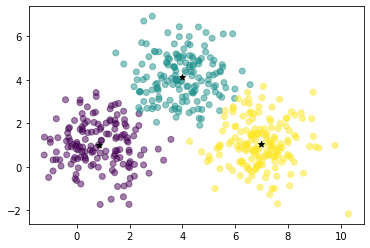

In [9]:
clusters = np.zeros(n_sample)    # 每个样本都对应一个类，相当于Y
dist = np.zeros((n_sample, k))    # 每个样本对每个质心都有一个距离

from copy import deepcopy
cent_pre = np.zeros(centers.shape)
cent_cur = gen_center(X_train,k)
cent_move = np.linalg.norm(cent_cur-cent_pre)    # 每轮迭代后质心的移动距离

epsilon = 1e-3    # 质心需要移动的最小距离
epoch = 0    # 当前迭代次数
max_iter = 50    # 最大迭代次数
while epoch < max_iter and cent_move > epsilon:
    epoch += 1

    # 首先计算每个样本离每个质心的距离
    for i in range(k):
        dist[:, i] = np.linalg.norm(X_train-cent_cur[i], axis=1)

    # 样本对应的类别为距离最近的质心
    clusters = np.argmin(dist, axis=1)

    cent_pre = deepcopy(cent_cur)

    # 计算每个类别下的均值坐标，更新质心
    for i in range(k):
        cent_cur[i] = np.mean(X_train[clusters == i], axis=0)

    cent_move = np.linalg.norm(cent_cur-cent_pre)
    
plt.clf()
plt.scatter(X_train[:, 0], X_train[:, 1], alpha=0.5, c=clusters)
plt.scatter(cent_cur[:, 0], cent_cur[:, 1], marker='*', c='k')
plt.show()

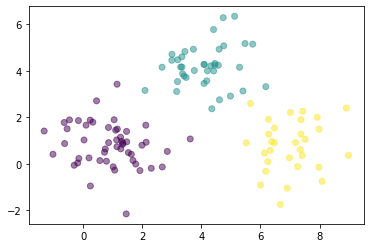

In [10]:

test_sample = X_test.shape[0]
dist_test = np.zeros((test_sample, k))

# KMeans预测的实质不过是计算各测试样例到各质心的距离，选取最近的质心作为归类
for i in range(k):
    dist_test[:, i] = np.linalg.norm(X_test-cent_cur[i], axis=1)
clus_pred = np.argmin(dist_test, axis=1)

plt.clf()
plt.scatter(X_test[:, 0], X_test[:, 1], alpha=0.5, c=clus_pred)
plt.show()

Kmeans++ 

In [ ]:
def gen_center(X_train, k):
    n_sample, n_feature = X_train.shape

    # 第一个质心随机选
    idx = np.random.randint(0, n_sample)
    centers = [X_train[idx, :]]

    # 选出后面k-1个质心
    for i in range(1, k):
        dist = np.zeros((n_sample, len(centers)))    # 各样本到质心的距离矩阵
        for cent_idx in range(len(centers)):
            dist[:, cent_idx] = np.linalg.norm(X_train-centers[cent_idx],
                                               axis=1)

        dist = np.min(dist, axis=1)    # 所有样本离各质心距离的最小值
        p = dist/np.sum(dist)    # 归一化后的最小距离当做概率进行下一个质心的选取，这里没有计算平方

        next_cent_idx = np.random.choice(n_sample, p=p)
        centers.append(X_train[next_cent_idx])

    return np.array(centers)


centers = gen_center(X_train, 3)
plt.clf()
plt.scatter(X_train[:, 0], X_train[:, 1], alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='k')
plt.show()

## 标准化评测


本次评测选择搜狗实验室提供的文本分类语料的一个子集，我称它为“搜狗文本分类语料库迷你版”。该迷你版语料库分为5个类目，每个类目下1000 篇文章，共计5000篇文章。运行代码如下

In [13]:
from pyhanlp import *

import zipfile
import os
from pyhanlp.static import download, remove_file, HANLP_DATA_PATH

def test_data_path():
    """
    获取测试数据路径，位于$root/data/test，根目录由配置文件指定。
    :return:
    """
    data_path = os.path.join(HANLP_DATA_PATH, 'test')
    if not os.path.isdir(data_path):
        os.mkdir(data_path)
    return data_path



## 验证是否存在 MSR语料库，如果没有自动下载
def ensure_data(data_name, data_url):
    root_path = test_data_path()
    dest_path = os.path.join(root_path, data_name)
    if os.path.exists(dest_path):
        return dest_path
    
    if data_url.endswith('.zip'):
        dest_path += '.zip'
    download(data_url, dest_path)
    if data_url.endswith('.zip'):
        with zipfile.ZipFile(dest_path, "r") as archive:
            archive.extractall(root_path)
        remove_file(dest_path)
        dest_path = dest_path[:-len('.zip')]
    return dest_path


sogou_corpus_path = ensure_data('搜狗文本分类语料库迷你版', 'http://file.hankcs.com/corpus/sogou-text-classification-corpus-mini.zip')


## ===============================================
## 以下开始聚类

ClusterAnalyzer = JClass('com.hankcs.hanlp.mining.cluster.ClusterAnalyzer')

if __name__ == '__main__':
    for algorithm in "kmeans", "repeated bisection":
        print("%s F1=%.2f\n" % (algorithm, ClusterAnalyzer.evaluate(sogou_corpus_path, algorithm) * 100))

kmeans F1=74.71

repeated bisection F1=83.32



# 文本分类


## 文本分类语料库